<a href="https://colab.research.google.com/github/ipediz/BachehayekhafaneTMU/blob/main/Meta_Learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('/content/nb21 (1).py')  # Add the Colab working directory to your Python path

import nb21 # Import the module (use the base name of your file without `.py`)

!pip install statsmodels
from nb21 import cumulative_gain, elast
import statsmodels.formula.api as smf
from matplotlib import style
style.use("ggplot")

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sys
sys.path.append('/content/nb21 (1).py')  # Add the Colab working directory to your Python path

import nb21 # Import the module (use the base name of your file without `.py`)

!pip install statsmodels
from nb21 import cumulative_gain, elast
import statsmodels.formula.api as smf
from matplotlib import style
style.use("ggplot")

In [ ]:
Data = pd.read_csv(r'All_STATE_CASUAL_READY_2.csv')

In [ ]:
Data['Treatment'] = Data['Treatment'].replace({1: True, 0: False})

<ipython-input-4-081ff9bcfa8e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data['Treatment'] = Data['Treatment'].replace({1: True, 0: False})


In [ ]:
from tabulate import tabulate

columns_to_drop = [
    'relative_time_m8andbeyond', 'relative_time_m7', 'relative_time_m6', 'relative_time_m5',
    'relative_time_m4', 'relative_time_m3', 'relative_time_m2', 'relative_time_m1', 'relative_time_0',
    'relative_time_p1', 'relative_time_p2', 'relative_time_p3', 'relative_time_p4',
    'relative_time_p5', 'relative_time_p6', 'relative_time_p7', 'relative_time_p8andbeyond',
    'cem_strata', 'cem_weights', 'new_timeperiod', 'nonbusiness_bankruptcy_percapita','business_bankruptcy_percapita', 'log_bankruptcy',]


Data1= Data.drop(columns=columns_to_drop)
Data1 = Data1.dropna();

In [ ]:
Data1['County_Treatment'] = Data1['county_code'].astype(str) + '_' + Data1['Treatment'].astype(str)


In [ ]:
from sklearn.model_selection import train_test_split
unique_counties = Data1['County_Treatment'].drop_duplicates()
train_counties, test_counties = train_test_split(
    unique_counties,
    test_size=0.2,
    random_state=42  # Ensure stratification
)

# Step 3: Create train and test datasets based on the split
train_data = Data1[Data1['County_Treatment'].isin(train_counties)]
test_data = Data1[Data1['County_Treatment'].isin(test_counties)]

# Check the splits
print("Train Set:")
print(train_data)
print("\nTest Set:")
print(test_data)

Train Set:
       county_code  lending_club_available  bankruptcy_per_capita  \
4             1019                       1               1.022579   
5             1019                       1               1.267997   
6             1019                       1               2.045157   
7             1019                       1               1.758835   
8             1019                       1               1.809362   
...            ...                     ...                    ...   
64478        56033                       1               0.369202   
64479        56033                       1               0.402766   
64480        56033                       1               0.333111   
64481        56033                       1               0.532978   
64482        56033                       1               0.732845   

       population_estimation  employed_individuals  monthly_earnings  \
4                  24.448000                 4.330             2.228   
5               

In [ ]:
Data1['Treatment'] = Data1['Treatment'].replace({True:1, False:0})

<ipython-input-8-7713c14a26b6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data1['Treatment'] = Data1['Treatment'].replace({True:1, False:0})


In [ ]:
Data1['Treatment'] = Data1['Treatment'].replace({True:1, False:0})

<ipython-input-8-7713c14a26b6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Data1['Treatment'] = Data1['Treatment'].replace({True:1, False:0})


In [ ]:
train_data['Treatment'] = train_data['Treatment'].astype(int)

<ipython-input-9-fb5ece14bb11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Treatment'] = train_data['Treatment'].astype(int)


In [ ]:
Y = Data1['bankruptcy_per_capita'].values
T = Data1['Treatment'].values

In [ ]:
X = Data1[['population_estimation', 'employed_individuals', 'monthly_earnings','labor_force','medianhouseholdincome']].values

In [ ]:

X = ['population_estimation', 'employed_individuals', 'monthly_earnings','labor_force','medianhouseholdincome']


T = ['Treatment']


y = 'bankruptcy_per_capita'


print(train_data[X].shape)
print(train_data[T].shape)
print(train_data[y].shape)


(51577, 5)
(51577, 1)
(51577,)


In [ ]:
features = X + T
print(train_data[features].shape)

(51577, 6)


In [ ]:
train_data = train_data.dropna(subset=features + [y])


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
s_learner = LGBMRegressor(max_depth=100, min_child_samples=100)
s_learner.fit(train_data[features], train_data[y])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1277
[LightGBM] [Info] Number of data points in the train set: 51577, number of used features: 6
[LightGBM] [Info] Start training from score 0.658183


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(max_depth=100, min_child_samples=100)

In [ ]:
s_learner.fit(train_data[X], train_data[y])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005162 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 51577, number of used features: 5
[LightGBM] [Info] Start training from score 0.658183


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The LGBMRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


LGBMRegressor(max_depth=100, min_child_samples=100)

In [ ]:
X = ['population_estimation', 'employed_individuals', 'monthly_earnings','labor_force','medianhouseholdincome']
T = 'Treatment'


In [ ]:
X = ['population_estimation', 'employed_individuals', 'monthly_earnings','labor_force','medianhouseholdincome']
T = 'Treatment'

s_learner_cate_train = (
    s_learner.predict(train_data[X].assign(**{T: 1})[X]) -
    s_learner.predict(train_data[X].assign(**{T: 0})[X])
)

s_learner_cate_test = test_data.assign(
    cate=(
        s_learner.predict(test_data[X].assign(**{T: 1})[X]) -
        s_learner.predict(test_data[X].assign(**{T: 0})[X])
    )
)


In [ ]:

ate_train = s_learner_cate_train.mean()

ate_test = s_learner_cate_test['cate'].mean()

print(f"ATE for Train Data: {ate_train}")
print(f"ATE for Test Data: {ate_test}")


ATE for Train Data: 0.0
ATE for Test Data: 0.0


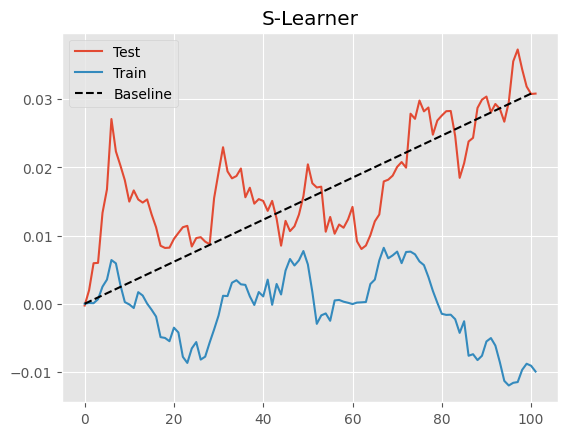

In [ ]:
gain_curve_test = cumulative_gain(s_learner_cate_test, "cate", y="bankruptcy_per_capita", t="Treatment")
gain_curve_train = cumulative_gain(train_data.assign(cate=s_learner_cate_train), "cate", y="bankruptcy_per_capita", t="Treatment")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test_data, "bankruptcy_per_capita", "Treatment")], linestyle="--", color="black", label="Baseline")
plt.legend()
plt.title("S-Learner");

In [ ]:
np.random.seed(123)

m0 = LGBMRegressor(max_depth=7, min_child_samples=60)
m1 = LGBMRegressor(max_depth=7, min_child_samples=60)

m0.fit(train_data.query(f"{T}==0")[X], train_data.query(f"{T}==0")[y])
m1.fit(train_data.query(f"{T}==1")[X], train_data.query(f"{T}==1")[y])

# estimate the CATE
t_learner_cate_train = m1.predict(train_data[X]) - m0.predict(train_data[X])
t_learner_cate_test = test_data.assign(cate=m1.predict(test_data[X]) - m0.predict(test_data[X]))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 35501, number of used features: 5
[LightGBM] [Info] Start training from score 0.661282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [ ]:
ate_train = t_learner_cate_train.mean()

ate_test = t_learner_cate_test['cate'].mean()

print(f"ATE for Train Data: {ate_train}")
print(f"ATE for Test Data: {ate_test}")

ATE for Train Data: -0.017763249282537145
ATE for Test Data: -0.008046171553802087


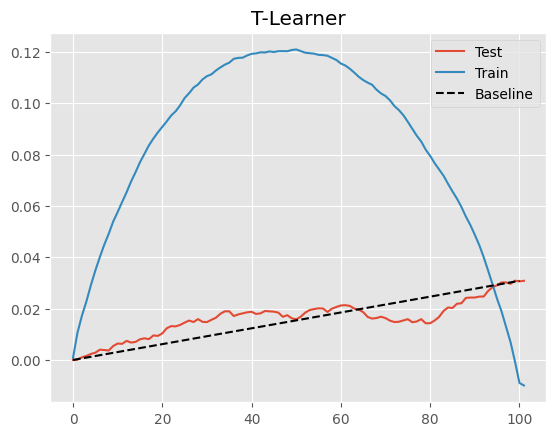

In [ ]:
gain_curve_test = cumulative_gain(t_learner_cate_test, "cate", y="bankruptcy_per_capita", t="Treatment")
gain_curve_train = cumulative_gain(train_data.assign(cate=t_learner_cate_train), "cate", y="bankruptcy_per_capita", t="Treatment")
plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test_data, "bankruptcy_per_capita", "Treatment")], linestyle="--", color="black", label="Baseline")
plt.legend();
plt.title("T-Learner");

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
from lightgbm import LGBMRegressor

np.random.seed(123)

# First stage models
m0 = LGBMRegressor(max_depth=2, min_child_samples=30)
m1 = LGBMRegressor(max_depth=2, min_child_samples=30)

# Propensity score model
g = LogisticRegression(solver="lbfgs")  # Use default penalty, which is 'l2'

# Fit the first stage models
m0.fit(train_data.query(f"{T}==0")[X], train_data.query(f"{T}==0")[y])
m1.fit(train_data.query(f"{T}==1")[X], train_data.query(f"{T}==1")[y])

# Fit the propensity score model
g.fit(train_data[X], train_data[T])


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 35501, number of used features: 5
[LightGBM] [Info] Start training from score 0.661282
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LogisticRegression()

In [ ]:
d_train = np.where(train_data[T]==0,
                   m1.predict(train_data[X]) - train_data[y],
                   train_data[y] - m0.predict(train_data[X]))

# second stage
mx0 = LGBMRegressor(max_depth=2, min_child_samples=30)
mx1 = LGBMRegressor(max_depth=2, min_child_samples=30)

mx0.fit(train_data.query(f"{T}==0")[X], d_train[train_data[T]==0])
mx1.fit(train_data.query(f"{T}==1")[X], d_train[train_data[T]==1]);

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 35501, number of used features: 5
[LightGBM] [Info] Start training from score -0.019216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [ ]:
def ps_predict(Data1, t):
    return g.predict_proba(Data1[X])[:, t]


x_cate_train = (ps_predict(train_data,1)*mx0.predict(train_data[X]) +
                ps_predict(train_data,0)*mx1.predict(train_data[X]))

x_cate_test = test_data.assign(cate=(ps_predict(test_data,1)*mx0.predict(test_data[X]) +
                                ps_predict(test_data,0)*mx1.predict(test_data[X])))

In [ ]:
ate_train = x_cate_train.mean()

ate_test = x_cate_test['cate'].mean()

print(f"ATE for Train Data: {ate_train}")
print(f"ATE for Test Data: {ate_test}")

ATE for Train Data: -0.01896109495322648
ATE for Test Data: -0.018135527483142542


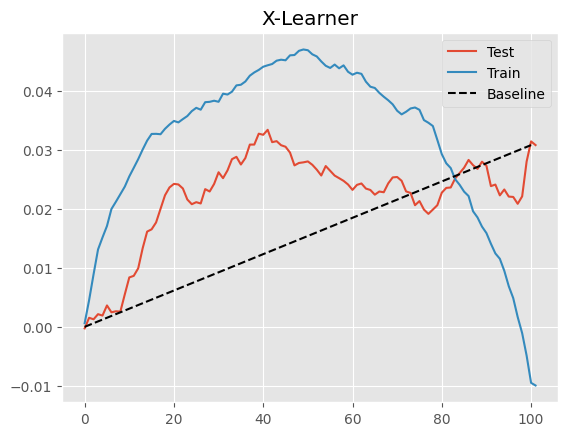

In [ ]:
gain_curve_test = cumulative_gain(x_cate_test, "cate", y="bankruptcy_per_capita", t="Treatment")
gain_curve_train = cumulative_gain(train_data.assign(cate=x_cate_train), "cate", y="bankruptcy_per_capita", t="Treatment")

plt.plot(gain_curve_test, color="C0", label="Test")
plt.plot(gain_curve_train, color="C1", label="Train")
plt.plot([0, 100], [0, elast(test_data, "bankruptcy_per_capita", "Treatment")], linestyle="--", color="black", label="Baseline")

plt.legend()
plt.title("X-Learner")
plt.show()
